# Function Calling/ Tool Calling

Function calling (also known as tool calling) is a mechanism that allows LLMs to invoke external functions or tools in a structured way. Instead of generating free-form text responses, the model can output structured JSON that represents function calls with specific parameters.

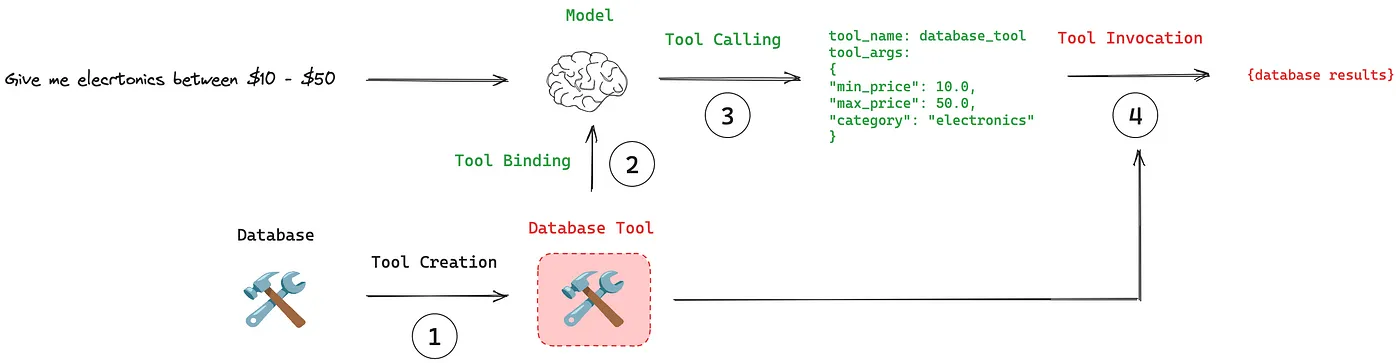

### Set up Environment:



In [1]:
from dotenv import load_dotenv
from langchain.tools import tool
from langchain.agents import create_tool_calling_agent, AgentExecutor
from langchain import hub
# from langchain_openai import ChatOpenAI
# from langchain_anthropic import ChatAnthropic
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

True

### Define Tools:



In [2]:

# Define simple tools
@tool
def get_weather(location: str) -> str:
    """Get current weather for a location"""
    weather_data = {
        "New York": "22°C, sunny",
        "London": "15°C, rainy",
        "Tokyo": "28°C, cloudy"
    }
    return weather_data.get(location, f"Weather data not available for {location}")

@tool
def calculate(expression: str) -> str:
    """Perform basic mathematical calculations"""
    try:
        result = eval(expression)
        return f"Result: {result}"
    except:
        return "Invalid calculation"

### Use create_tool_calling_agent() and integrate with AgentExecutor:



In [ ]:
# Option 1: OpenAI
# llm = ChatOpenAI(model="gpt-3.5-turbo", temperature=0)

# Option 2: Anthropic
# llm = ChatAnthropic(model="claude-3-sonnet-20240229", temperature=0)

# Option 3: Google Gemini
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0)

tools = [get_weather, calculate]

# Use create_tool_calling_agent 
prompt = hub.pull("hwchase17/openai-tools-agent")  # Generic tool calling prompt
agent = create_tool_calling_agent(llm, tools, prompt)

agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)


### Testing

In [ ]:

# Test queries
queries = [
    "What's the weather in Tokyo?",
    "Calculate 15 * 8 + 20",
    "Get weather for London and calculate 25% of 80"
]

for query in queries:
    print(f"\n Query: {query}")
    response = agent_executor.invoke({"input": query})
    print(f" Response: {response['output']}")



 Query: What's the weather in Tokyo?


> Entering new AgentExecutor chain...

Invoking: `get_weather` with `{'location': 'Tokyo'}`


28°C, cloudyThe weather in Tokyo is 28°C and cloudy.


> Finished chain.
 Response: The weather in Tokyo is 28°C and cloudy.


 Query: Calculate 15 * 8 + 20


> Entering new AgentExecutor chain...

Invoking: `calculate` with `{'expression': '15 * 8 + 20'}`


Result: 140The answer is 140.


> Finished chain.
 Response: The answer is 140.


 Query: Get weather for London and calculate 25% of 80


> Entering new AgentExecutor chain...

Invoking: `get_weather` with `{'location': 'London'}`


15°C, rainy
Invoking: `calculate` with `{'expression': '80*0.25'}`


Result: 20.0The weather in London is 15°C and rainy. 25% of 80 is 20.


> Finished chain.
 Response: The weather in London is 15°C and rainy. 25% of 80 is 20.



# ReAct

In [3]:
from langchain.agents import create_react_agent, AgentExecutor
from langchain import hub

# Initialize LLM (works with any model)
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp", temperature=0)
tools = [get_weather, calculate]

# Create ReAct agent
prompt = hub.pull("hwchase17/react")
agent = create_react_agent(llm, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

# Test complex query
response = agent_executor.invoke({
    "input": "What's the weather in Tokyo and calculate 25% of 80?"
})

print(f"ReAct Response: {response['output']}")



> Entering new AgentExecutor chain...
I need to get the weather in Tokyo and calculate 25% of 80. I will use the tools to do this.
Action: get_weather
Action Input: Tokyo28°C, cloudyI have the weather in Tokyo. Now I need to calculate 25% of 80.
Action: calculate
Action Input: 25% * 80Invalid calculationI made a mistake in the calculation input. I need to express 25% as a decimal.
Action: calculate
Action Input: 0.25 * 80Result: 20.0I have the weather in Tokyo and the result of the calculation.
Final Answer: The weather in Tokyo is 28°C, cloudy and 25% of 80 is 20.


> Finished chain.
ReAct Response: The weather in Tokyo is 28°C, cloudy and 25% of 80 is 20.
